# Example 5 - Folded Layers

This example will show how to convert the geological map below using ``GemGIS`` to a `GemPy` model. This example is based on digitized data. The area is 2963 m wide (W-E extent) and 3715 m high (N-S extent). The model represents several planar stratigraphic units (yellow to light red) dipping towards the west above an unspecified basement (green). The blue and purple unit overlay the remaining strata unconformably and dip to the north. The map has been georeferenced with QGIS. The stratigraphic boundaries were digitized in QGIS. Strikes lines were digitized in QGIS as well and will be used to calculate orientations for the `GemPy` model. The contour lines were also digitized and will be interpolated with `GemGIS` to create a topography for the model. 

<img src="../images/cover_example05.png" width="700">

Map Source: An Introduction to Geological Structures and Maps by G.M. Bennison

In [1]:
import gemgis as gg

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import geopandas as gpd
import rasterio 

In [3]:
topo = gpd.read_file('topo5.shp')
topo.head()

,id,Z,geometry
0,None,700,"LINESTRING (1.537 2299.193, 29.191 2272.378, 7..."
1,None,600,"LINESTRING (81.145 2708.127, 130.586 2641.927,..."
2,None,600,"LINESTRING (6.565 403.682, 56.006 360.945, 103..."
3,None,600,"LINESTRING (3278.040 2.289, 3308.208 32.456, 3..."
4,None,600,"LINESTRING (2258.218 1964.001, 2375.536 1953.1..."


In [4]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=10)


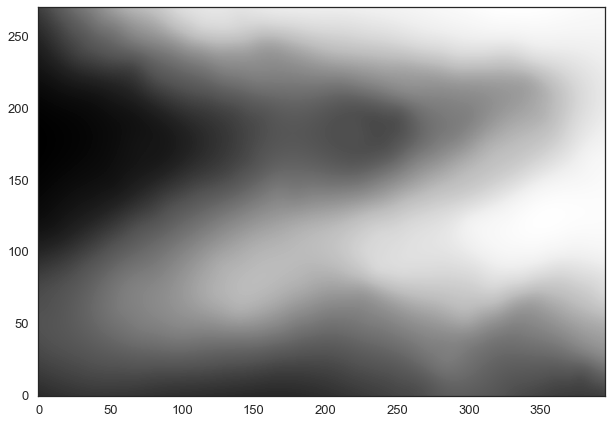

In [5]:
import matplotlib.pyplot as plt
plt.imshow(topo_raster, origin='lower')

In [6]:
topo_raster = rasterio.open('raster5.tif')

In [7]:
interfaces = gpd.read_file('interfaces5.shp')
interfaces.head()

,id,formation,geometry
0,None,A,"LINESTRING (591.475 2.289, 609.073 69.327, 643..."
1,None,A,"LINESTRING (3448.150 3.127, 3500.105 128.824, ..."
2,None,B,"LINESTRING (265.501 1.451, 290.641 89.439, 317..."
3,None,B,"LINESTRING (2284.196 1.451, 2264.084 109.550, ..."
4,None,B,"LINESTRING (3480.832 2222.937, 3450.664 2140.8..."


In [8]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords = interfaces_coords.sort_values(by='formation', ascending=False)
# interfaces_coords = interfaces_coords[interfaces_coords['formation'].isin([])] 
interfaces_coords

,formation,geometry,X,Y,Z
94,B,POINT (412.148 639.154),412.15,639.15,538.20
129,B,POINT (2204.588 299.772),2204.59,299.77,578.98
120,B,POINT (345.109 2463.437),345.11,2463.44,588.11
121,B,POINT (412.986 2520.420),412.99,2520.42,547.54
122,B,POINT (456.561 2560.643),456.56,2560.64,518.60
...,...,...,...,...,...
61,A,POINT (1643.141 1228.254),1643.14,1228.25,436.22
62,A,POINT (1606.270 1157.864),1606.27,1157.86,419.63
63,A,POINT (1569.399 1074.066),1569.40,1074.07,402.09
64,A,POINT (1537.555 1003.675),1537.56,1003.68,390.91


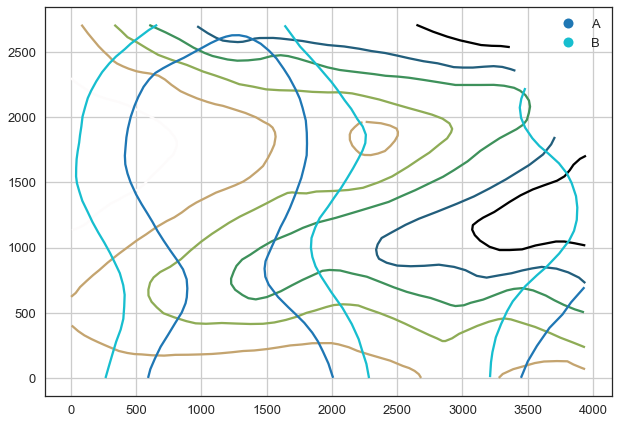

In [9]:
fig, ax = plt.subplots(1)

topo.plot(ax=ax, column='Z', cmap='gist_earth', aspect='equal')
interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')

plt.grid()

In [10]:
strikes = gpd.read_file('strikes5.shp')
strikes

,id,formation,Z,geometry
0,2,B1,700,"LINESTRING (149.860 2191.094, 154.888 1214.846)"
1,1,B1,600,"LINESTRING (319.551 2436.622, 321.855 916.106)"
2,3,A1,700,"LINESTRING (481.281 2067.910, 488.404 1433.140)"
3,2,A1,600,"LINESTRING (636.098 2326.846, 655.529 174.023)"
4,1,A1,500,"LINESTRING (807.413 2426.933, 822.287 456.422)"
5,2,A2,500,"LINESTRING (1725.629 2204.030, 1737.885 473.391)"
6,1,A2,400,"LINESTRING (1556.253 2469.041, 1567.356 648.529)"
7,1,B2,400,"LINESTRING (1890.816 1193.007, 1900.453 810.050)"
8,2,B2,500,"LINESTRING (2062.183 564.521, 2056.317 1437.278)"
9,3,B2,600,"LINESTRING (2216.791 1955.150, 2236.483 196.648)"


In [11]:
orientations_a1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='A1'].sort_values(by='Z', ascending=True).reset_index())
orientations_a1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,30.57,89.52,550.00,POINT (730.331 1346.056),1.00,A1,730.33,1346.06
1,32.70,89.47,650.00,POINT (565.328 1500.480),1.00,A1,565.33,1500.48


In [12]:
orientations_a2 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='A2'].sort_values(by='Z', ascending=True).reset_index())
orientations_a2

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,30.80,269.62,450.00,POINT (1646.781 1448.748),1.00,A2,1646.78,1448.75


In [13]:
orientations_b1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='B1'].sort_values(by='Z', ascending=True).reset_index())
orientations_b1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,30.99,89.85,650.00,POINT (236.538 1689.667),1.00,B1,236.54,1689.67


In [14]:
orientations_b2 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='B2'].sort_values(by='Z', ascending=True).reset_index())
orientations_b2

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,31.99,269.44,450.00,POINT (1977.443 1001.214),1.00,B2,1977.44,1001.21
1,31.03,269.41,550.00,POINT (2142.944 1038.399),1.00,B2,2142.94,1038.40


In [15]:
orientations_b3 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='B3'].sort_values(by='Z', ascending=True).reset_index())
orientations_b3

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,30.70,269.51,450.00,POINT (1970.005 1806.958),1.00,B3,1970.01,1806.96
1,31.88,269.85,550.00,POINT (2137.235 1825.158),1.00,B3,2137.23,1825.16


In [16]:
import pandas as pd
orientations = pd.concat([orientations_a1, orientations_a2, orientations_b1, orientations_b2, orientations_b3]).reset_index()
orientations = orientations[orientations['formation'].isin(['A1', 'A2','B1', 'B2', 'B3'])]
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,30.57,89.52,550.00,POINT (730.331 1346.056),1.00,A1,730.33,1346.06
1,1,32.70,89.47,650.00,POINT (565.328 1500.480),1.00,A1,565.33,1500.48
2,0,30.80,269.62,450.00,POINT (1646.781 1448.748),1.00,A2,1646.78,1448.75
3,0,30.99,89.85,650.00,POINT (236.538 1689.667),1.00,B1,236.54,1689.67
4,0,31.99,269.44,450.00,POINT (1977.443 1001.214),1.00,B2,1977.44,1001.21
5,1,31.03,269.41,550.00,POINT (2142.944 1038.399),1.00,B2,2142.94,1038.40
6,0,30.70,269.51,450.00,POINT (1970.005 1806.958),1.00,B3,1970.01,1806.96
7,1,31.88,269.85,550.00,POINT (2137.235 1825.158),1.00,B3,2137.23,1825.16


In [17]:
import numpy as np 
orientations['dip'] = np.abs(orientations['dip'].values)
orientations['formation'] = ['A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,30.57,89.52,550.00,POINT (730.331 1346.056),1.00,A,730.33,1346.06
1,1,32.70,89.47,650.00,POINT (565.328 1500.480),1.00,A,565.33,1500.48
2,0,30.80,269.62,450.00,POINT (1646.781 1448.748),1.00,A,1646.78,1448.75
3,0,30.99,89.85,650.00,POINT (236.538 1689.667),1.00,B,236.54,1689.67
4,0,31.99,269.44,450.00,POINT (1977.443 1001.214),1.00,B,1977.44,1001.21
5,1,31.03,269.41,550.00,POINT (2142.944 1038.399),1.00,B,2142.94,1038.40
6,0,30.70,269.51,450.00,POINT (1970.005 1806.958),1.00,B,1970.01,1806.96
7,1,31.88,269.85,550.00,POINT (2137.235 1825.158),1.00,B,2137.23,1825.16


In [18]:
import gempy as gp

In [19]:
geo_model = gp.create_model('Model5')
geo_model

Model5  2021-03-29 09:03

In [20]:
gp.init_data(geo_model, [0,3942,0,2710,-200,1000], [50,50,75],
             surface_points_df = interfaces_coords[interfaces_coords['Z']!=0],
             orientations_df = orientations,
             default_values=True)

Active grids: ['regular']


Model5  2021-03-29 09:03

In [21]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,B,Default series,1,#015482,1
1,A,Default series,2,#9f0052,2


In [22]:
gp.map_stack_to_surfaces(geo_model,
                         {
                          'Strata1': ('A','B'),
                         
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('Basement')

,surface,series,order_surfaces,color,id
0,B,Strata1,1,#015482,1
1,A,Strata1,2,#9f0052,2
2,Basement,Strata1,3,#ffbe00,3


In [23]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
0,B,Strata1,1,#015482,1,101,5
1,A,Strata1,2,#9f0052,2,87,3
2,Basement,Strata1,3,#ffbe00,3,0,0


In [24]:
custom_section = gpd.read_file('customsection5.shp')
custom_section_dict = gg.utils.to_section_dict(custom_section, section_column='name')
geo_model.set_section_grid(custom_section_dict)

Active grids: ['regular' 'sections']


,start,stop,resolution,dist
Section1,"[6.565213969151387, 963.4523850507635]","[3931.665030709532, 366.8103975359992]","[100, 80]",3970.19


In [25]:
geo_model.set_topography(
    source='gdal', filepath='raster5.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography' 'sections']


Grid Object. Values: 
array([[  39.42      ,   27.1       , -192.        ],
       [  39.42      ,   27.1       , -176.        ],
       [  39.42      ,   27.1       , -160.        ],
       ...,
       [3931.66503071,  366.81039754,  969.62025316],
       [3931.66503071,  366.81039754,  984.81012658],
       [3931.66503071,  366.81039754, 1000.        ]])

In [26]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            4931.88
$C_o$           579130.1
drift equations      [3]


In [27]:
sol = gp.compute_model(geo_model, compute_mesh=True)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\core\solution.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.geological_map = np.array([values[0][:, l0: l1], values[4][:, l0: l1].astype(float)])
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\core\solution.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.sections = np.array([values[0][:, l0: l1], values[4][:, l0: l1].astype(float)])


C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


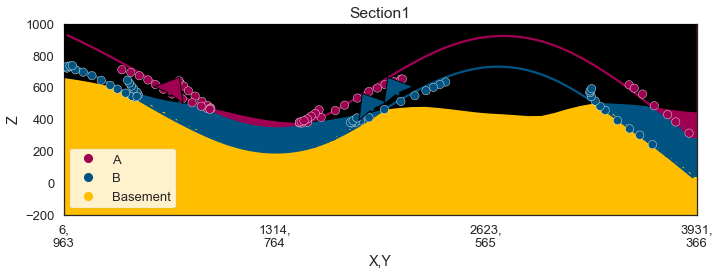

In [28]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True)

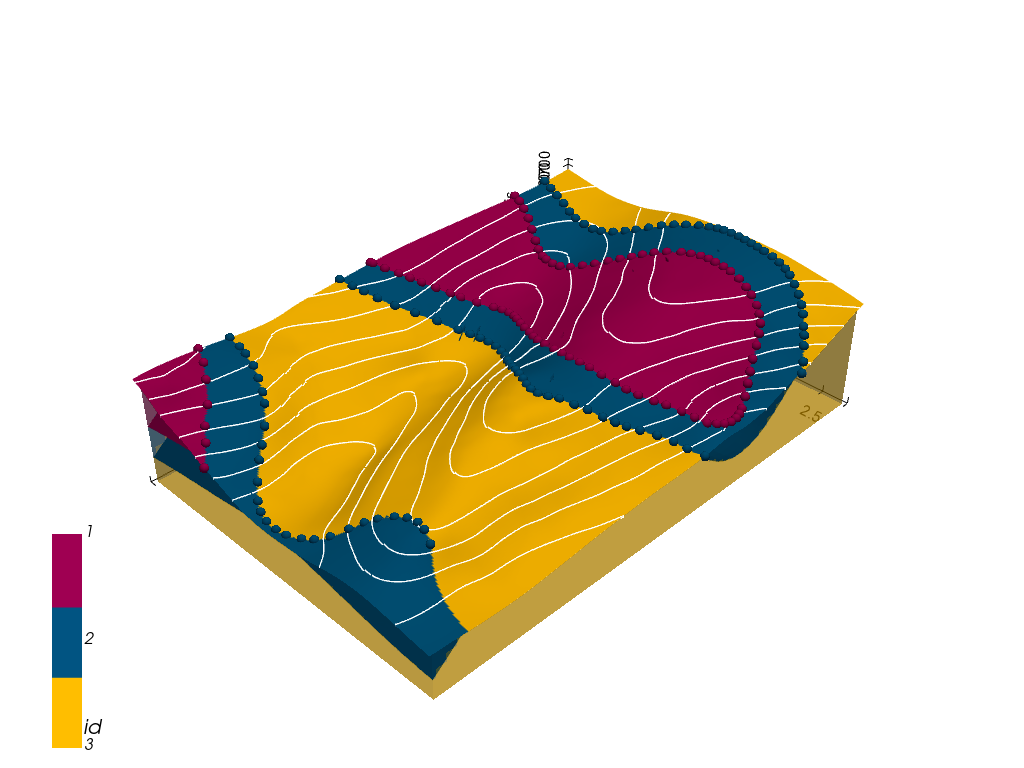

In [29]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)